In [30]:
import pandas as pd
df = pd.read_csv('insta_dataset (1).csv')
print(df.head())
print(df.columns)


        username post_number  \
0  kayla_itsines      post_1   
1  kayla_itsines      post_2   
2  kayla_itsines      post_3   
3  kayla_itsines      post_4   
4  kayla_itsines      post_5   

                                            post_url   likes  \
0  https://www.instagram.com/kayla_itsines/p/C6I1...   8,397   
1  https://www.instagram.com/kayla_itsines/p/C8ZC...   6,294   
2  https://www.instagram.com/kayla_itsines/p/CueW...  13,805   
3  https://www.instagram.com/kayla_itsines/p/Cx5u...  54,548   
4  https://www.instagram.com/kayla_itsines/p/CvhW...  27,683   

                                            hashtags  \
0  #SweatWithKayla, #SweatApp, #PersonalTrainer, ...   
1  #SweatDaily, #Podcast, #StoryGlass, #HealthyHa...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                            comments  
0  alexia_clark: Absolutely! R

In [31]:
# Check for missing values
print(df.isnull().sum())


username        0
post_number     0
post_url        0
likes           0
hashtags       35
comments        5
dtype: int64


In [32]:
df['comments'].fillna('', inplace=True)
df['hashtags'].fillna('', inplace=True)
print(df.isnull().sum())

username       0
post_number    0
post_url       0
likes          0
hashtags       0
comments       0
dtype: int64


<ipython-input-32-d4d2143b46b7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comments'].fillna('', inplace=True)
<ipython-input-32-d4d2143b46b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [33]:
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the text
def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only letters and spaces
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply text preprocessing to the comments column
df['cleaned_comments'] = df['comments'].apply(preprocess_text)

# Preview the cleaned comments
print(df[['comments', 'cleaned_comments']].head())


                                            comments  \
0  alexia_clark: Absolutely! Rest is an essential...   
1  _joanna70: Agree 👏 can I add keep hydrated 💦; ...   
2  jagz_1990: Sooooo pretty 🔥; mo.inshape: It’s d...   
3  tracycampbell01: Totally relate. Just one more...   
4  mary.huntress.pwr: The cutest! 💖💖💖; emmakateoc...   

                                    cleaned_comments  
0  alexiaclark absolutely rest essential part sel...  
1  joanna agree add keep hydrated siljealice mass...  
2  jagz sooooo pretty moinshape definitely import...  
3  tracycampbell totally relate one shnatkumarujj...  
4  maryhuntresspwr cutest emmakateoconnor cuties ...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def sentiment_analysis(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to the cleaned comments
df['sentiment_score'] = df['cleaned_comments'].apply(sentiment_analysis)

# Preview the sentiment scores
print(df[['cleaned_comments', 'sentiment_score']].head())


                                    cleaned_comments  sentiment_score
0  alexiaclark absolutely rest essential part sel...           0.9875
1  joanna agree add keep hydrated siljealice mass...           0.9877
2  jagz sooooo pretty moinshape definitely import...           0.9948
3  tracycampbell totally relate one shnatkumarujj...           0.9909
4  maryhuntresspwr cutest emmakateoconnor cuties ...           0.9882


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
df['comments_count'] = df['comments'].apply(lambda x: len(str(x).split()))

In [36]:
# Convert 'likes' and 'comments_count' to strings first, then remove commas
df['likes'] = df['likes'].astype(str).str.replace(',', '')
df['comments_count'] = df['comments_count'].astype(str).str.replace(',', '')

# Convert to numeric (this will convert invalid parsing to NaN, which can be filled)
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments_count'] = pd.to_numeric(df['comments_count'], errors='coerce')
df['likes'].fillna('', inplace=True)
df['comments_count'].fillna('', inplace=True)
print(df[['likes', 'comments_count']].head())


   likes  comments_count
0   8397             152
1   6294             125
2  13805             171
3  54548             280
4  27683              77


<ipython-input-36-fe20d982d2c2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['likes'].fillna('', inplace=True)
<ipython-input-36-fe20d982d2c2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [37]:
# Ensure the 'likes' column is treated as a string before replacing commas
df['likes'] = pd.to_numeric(df['likes'].astype(str).str.replace(',', ''), errors='coerce')

# Ensure the 'comments_count' column is treated as a string before replacing commas
df['comments_count'] = pd.to_numeric(df['comments_count'].astype(str).str.replace(',', ''), errors='coerce')

# Fill any NaN values with 0
df.fillna(0, inplace=True)


In [38]:
print(df.dtypes)

username             object
post_number          object
post_url             object
likes                 int64
hashtags             object
comments             object
cleaned_comments     object
sentiment_score     float64
comments_count        int64
dtype: object


In [39]:
# Define the input features (X) and target (y)
X = df[['comments_count', 'sentiment_score']]  # Features
y = df['likes']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (42, 2)
y_train shape: (42,)


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Dictionary to store model results
results = {}

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse
    # Return the predictions for comparison
    return y_pred

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_predictions = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# 2. Linear Regression
lr_model = LinearRegression()
lr_predictions = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Linear Regression")

# 3. Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')  # Using RBF kernel
svr_predictions = train_and_evaluate_model(svr_model, X_train, y_train, X_test, y_test, "Support Vector Regressor")

# Print the comparison of MSE for all models
print("\nModel Comparison (Mean Squared Error):")
for model_name, mse in results.items():
    print(f"{model_name}: {mse}")


Model Comparison (Mean Squared Error):
Random Forest: 4137328486.765767
Linear Regression: 3972416403.858324
Support Vector Regressor: 5366814779.830685


In [41]:
from sklearn.metrics import classification_report
import numpy as np

# Define a function to categorize engagement into classes
def categorize_engagement(values, thresholds=[1000, 10000]):
    """
    Categorizes engagement into 3 classes:
    0 - Low, 1 - Medium, 2 - High
    """
    categories = []
    for val in values:
        if val < thresholds[0]:
            categories.append(0)  # Low engagement
        elif thresholds[0] <= val < thresholds[1]:
            categories.append(1)  # Medium engagement
        else:
            categories.append(2)  # High engagement
    return np.array(categories)

# Apply categorization to actual test values
y_test_class = categorize_engagement(y_test)

# Function to train, evaluate, and generate classification report
def train_evaluate_classification(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Categorize the predictions
    y_pred_class = categorize_engagement(y_pred)

    # Get the unique classes present in the true test set
    unique_classes = np.unique(np.concatenate((y_test_class, y_pred_class)))
    target_names = ['Low', 'Medium', 'High'][:len(unique_classes)]

    # Generate classification report
    report = classification_report(y_test_class, y_pred_class, labels=unique_classes, target_names=target_names, zero_division=0)
    print(f"\n{model_name} - Classification Report:\n")
    print(report)

    return y_pred_class

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pred_class = train_evaluate_classification(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# 2. Linear Regression
lr_model = LinearRegression()
lr_pred_class = train_evaluate_classification(lr_model, X_train, y_train, X_test, y_test, "Linear Regression")

# 3. Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')
svr_pred_class = train_evaluate_classification(svr_model, X_train, y_train, X_test, y_test, "Support Vector Regressor")



Random Forest - Classification Report:

              precision    recall  f1-score   support

         Low       1.00      0.50      0.67         4
      Medium       0.00      0.00      0.00         0
        High       0.88      1.00      0.93         7

    accuracy                           0.82        11
   macro avg       0.62      0.50      0.53        11
weighted avg       0.92      0.82      0.84        11


Linear Regression - Classification Report:

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         4
      Medium       0.00      0.00      0.00         0
        High       0.78      1.00      0.88         7

    accuracy                           0.64        11
   macro avg       0.26      0.33      0.29        11
weighted avg       0.49      0.64      0.56        11


Support Vector Regressor - Classification Report:

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00  

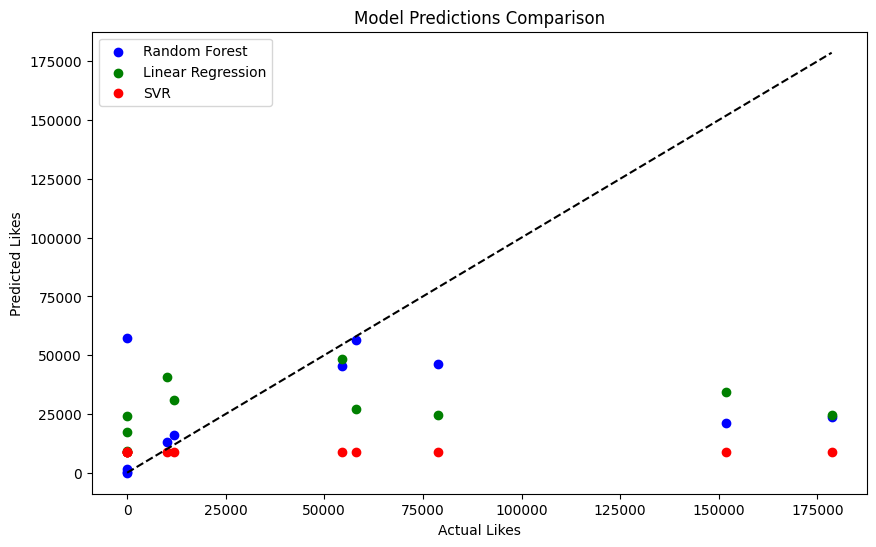

In [42]:
import matplotlib.pyplot as plt

# Create a plot to compare actual vs predicted values for all models
plt.figure(figsize=(10, 6))

# Scatter plot for Random Forest predictions
plt.scatter(y_test, rf_predictions, label='Random Forest', color='blue')

# Scatter plot for Linear Regression predictions
plt.scatter(y_test, lr_predictions, label='Linear Regression', color='green')

# Scatter plot for SVR predictions
plt.scatter(y_test, svr_predictions, label='SVR', color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Labels
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Model Predictions Comparison')
plt.legend()
plt.show()


    Actual     Predicted
19  151813  34493.459260
41      50   9103.602116
47      90  24020.304532
12   78905  24635.153808
43      32   8906.894137


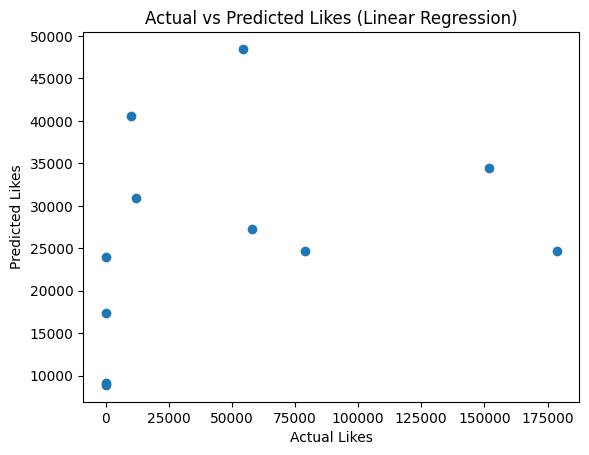

In [46]:
# Choose the predictions of the specific model (e.g., Linear Regression)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predictions})
print(comparison.head())
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs Predicted Likes (Linear Regression)')
plt.show()


    Actual     Predicted
19  151813  21133.900000
41      50     26.676810
47      90  57138.440000
12   78905  46231.550000
43      32    304.579976


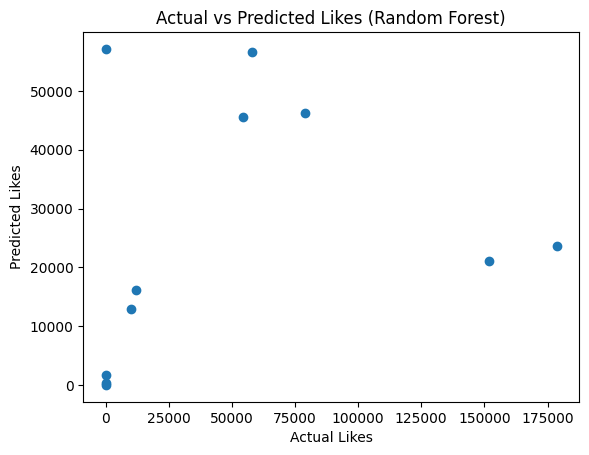

In [49]:
# Choose the predictions of the specific model (e.g., Linear Regression)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print(comparison.head())
plt.scatter(y_test, rf_predictions)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs Predicted Likes (Random Forest)')
plt.show()

    Actual    Predicted
19  151813  8801.341608
41      50  8793.751069
47      90  8796.347038
12   78905  8797.143124
43      32  8793.669268


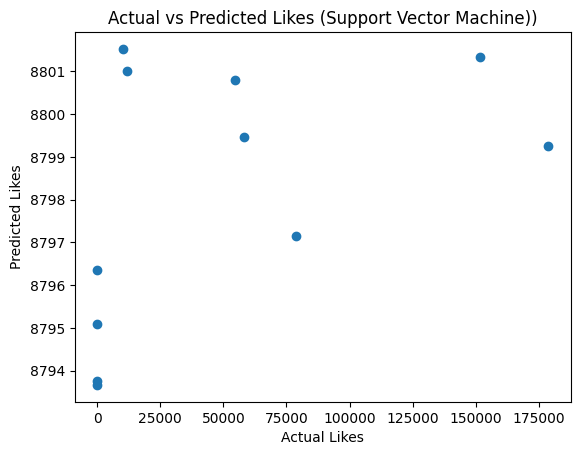

In [50]:
# Choose the predictions of the specific model (e.g., Linear Regression)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': svr_predictions})
print(comparison.head())
plt.scatter(y_test, svr_predictions)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs Predicted Likes (Support Vector Machine))')
plt.show()

In [45]:
#again using linear regression as it is giving less error rate compared to other models
#using for recommendation system
mse_lr=results['Linear Regression']
mse_threshold = mse_lr * 0.00001
print(f"MSE of the model: {mse_lr}, and MSE threshold (0.00001 * MSE): {mse_threshold}")

df_grouped = df.groupby('username').agg({'likes': 'sum'}).reset_index()

# Function to recommend users based on MSE threshold
def recommend_users(row, mse_threshold):
    if row['likes'] > mse_threshold:
        return "can be followed for fitness connect"
    else:
        return "content is not efficient to follow"

df_grouped['recommendation'] = df_grouped.apply(lambda row: recommend_users(row, mse_threshold), axis=1)

recommendation_df = df_grouped[['username', 'likes', 'recommendation']]
print(recommendation_df)

MSE of the model: 3972416403.858324, and MSE threshold (0.00001 * MSE): 39724.16403858324
                 username   likes                       recommendation
0     _fitness__vlogger__     290   content is not efficient to follow
1        adarshfitness.in     397   content is not efficient to follow
2            emilyskyefit  246609  can be followed for fitness connect
3       fitness__vloggers       7   content is not efficient to follow
4           kayla_itsines  267432  can be followed for fitness connect
5  lazar_angelov_official  116852  can be followed for fitness connect
6             simeonpanda  945425  can be followed for fitness connect


In [64]:
# Calculate the threshold as before
mse_lr = results['Linear Regression']
mse_threshold = mse_lr * 0.00001
print(f"MSE of the model: {mse_lr}, and MSE threshold (0.00001 * MSE): {mse_threshold}")

# Group by 'username' and aggregate 'comments_count' and 'sentiment_score' (used as features in prediction)
df_grouped = df.groupby('username').agg({
    'comments_count': 'sum',
    'sentiment_score': 'mean'
}).reset_index()

# Predict the likes for each user using the trained Linear Regression model
df_grouped['predicted_likes'] = lr_model.predict(df_grouped[['comments_count', 'sentiment_score']])

# Function to generate recommendation based on predicted likes
def recommend_users(row, mse_threshold):
    if row['predicted_likes'] > mse_threshold:
        return f"can be followed for fitness connect as {round(row['predicted_likes'])} likes predicted "
    else:
        return f"content is not efficient to follow as only {round(row['predicted_likes'])} likes predicted "

df_grouped['recommendation'] = df_grouped.apply(lambda row: recommend_users(row, mse_threshold), axis=1)
recommendation_df = df_grouped[['username', 'recommendation']]
print(recommendation_df.to_string())


MSE of the model: 3972416403.858324, and MSE threshold (0.00001 * MSE): 39724.16403858324
                 username                                                     recommendation
0     _fitness__vlogger__  content is not efficient to follow as only 23031 likes predicted 
1        adarshfitness.in  content is not efficient to follow as only 19179 likes predicted 
2            emilyskyefit     can be followed for fitness connect as 107244 likes predicted 
3       fitness__vloggers   content is not efficient to follow as only 8710 likes predicted 
4           kayla_itsines     can be followed for fitness connect as 170546 likes predicted 
5  lazar_angelov_official     can be followed for fitness connect as 123720 likes predicted 
6             simeonpanda     can be followed for fitness connect as 104755 likes predicted 


In [68]:
def get_user_recommendation(username):
    user_info = recommendation_df[recommendation_df['username'] == username]
    if not user_info.empty:
        # If the user exists in the dataset, print their recommendation
        recommendation = user_info['recommendation'].values[0]
        print(f"Yes,page {recommendation}")
    else:
        print(f"Username '{username}' not found in the dataset.")

# Example usage: Enter a specific username to get a recommendation
user_input = input("Enter a username to check recommendation: ")
get_user_recommendation(user_input)

Enter a username to check recommendation: simeonpanda
Yes,page can be followed for fitness connect as 104755 likes predicted 
